In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob

In [2]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1, plot_clusters_online

In [9]:
save_single = False
plt.rcParams.update({'font.size': 12})

In [6]:
save_single = True
plt.rcParams.update({'font.size': 16})

# linreg

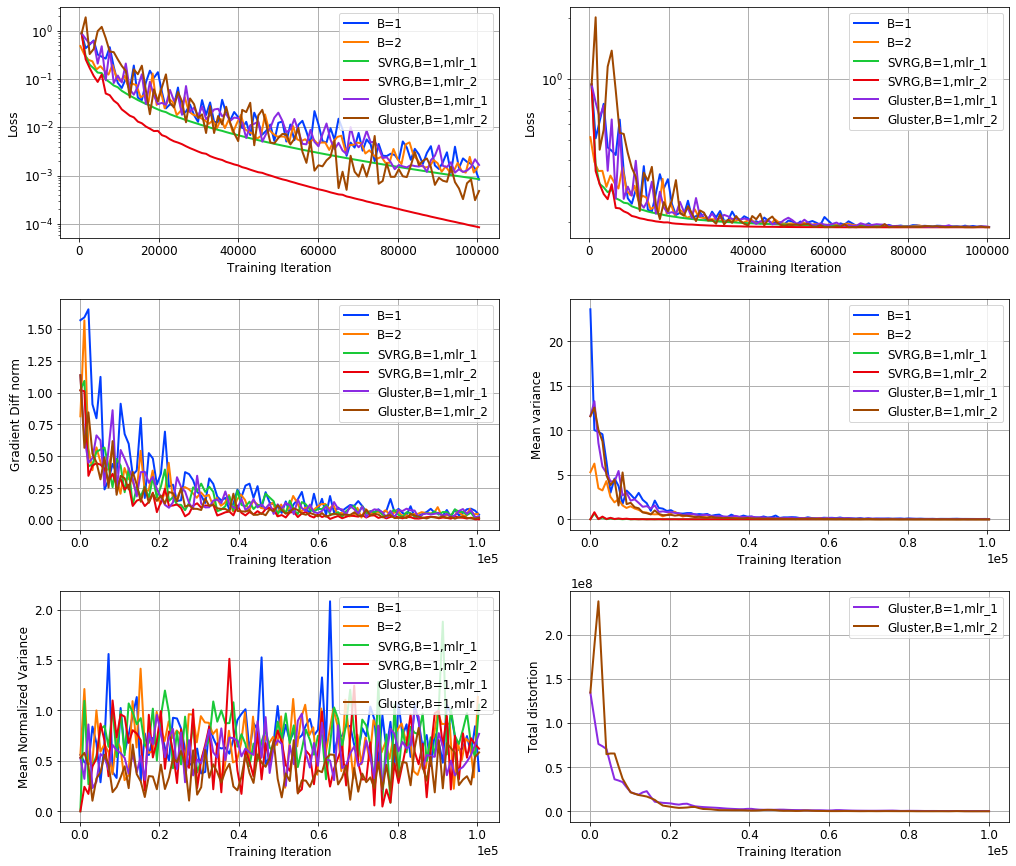

In [20]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5/.*seed_123']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2019/linreg.png'
lg_tags = ['sgd,sgd', 'svrg', 'gluster', 'batch_size', 'mlr']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = None
no_title = True
lg_replace = [('sgd,sgd', 'sgd'), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- svrg is always better, of course, it is asymp batch gd
- gluster from one step to another cannot do anything, so B<C is not good in linreg

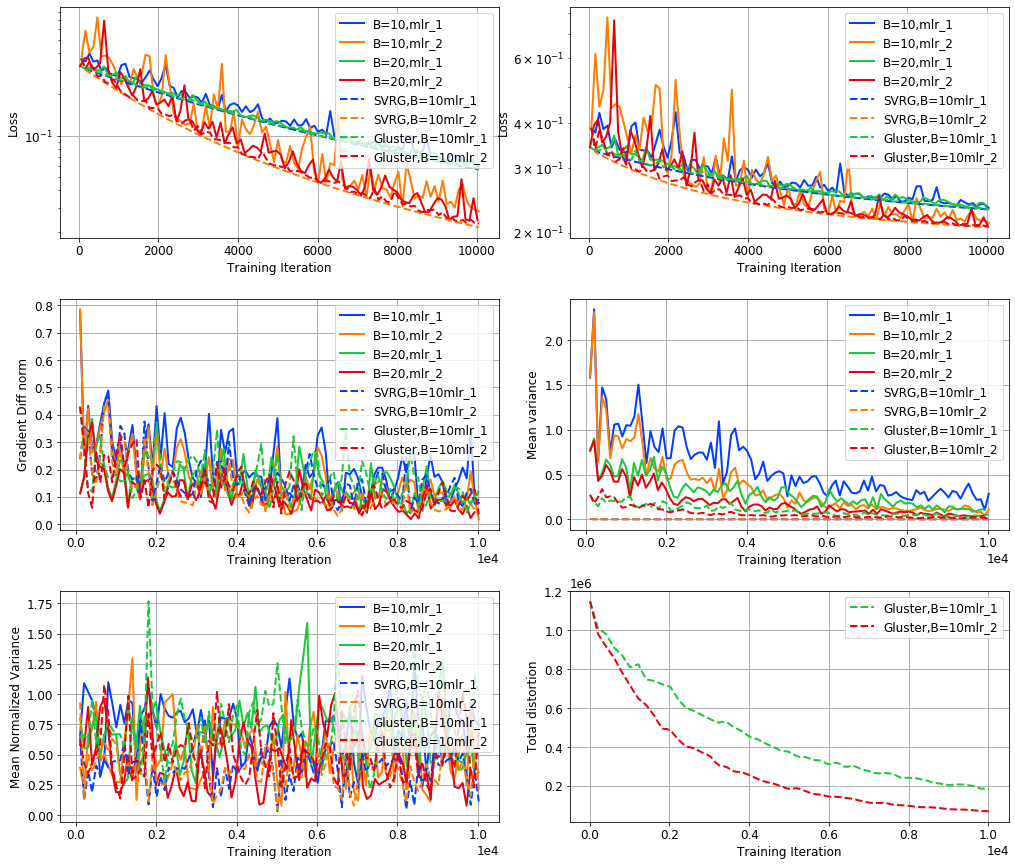

In [27]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5_bs10/']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2019/linreg.png'
lg_tags = ['sgd,sgd', 'svrg', 'gluster', 'batch_size', 'mlr']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = True
lg_replace = [('sgd,sgd', 'sgd'), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

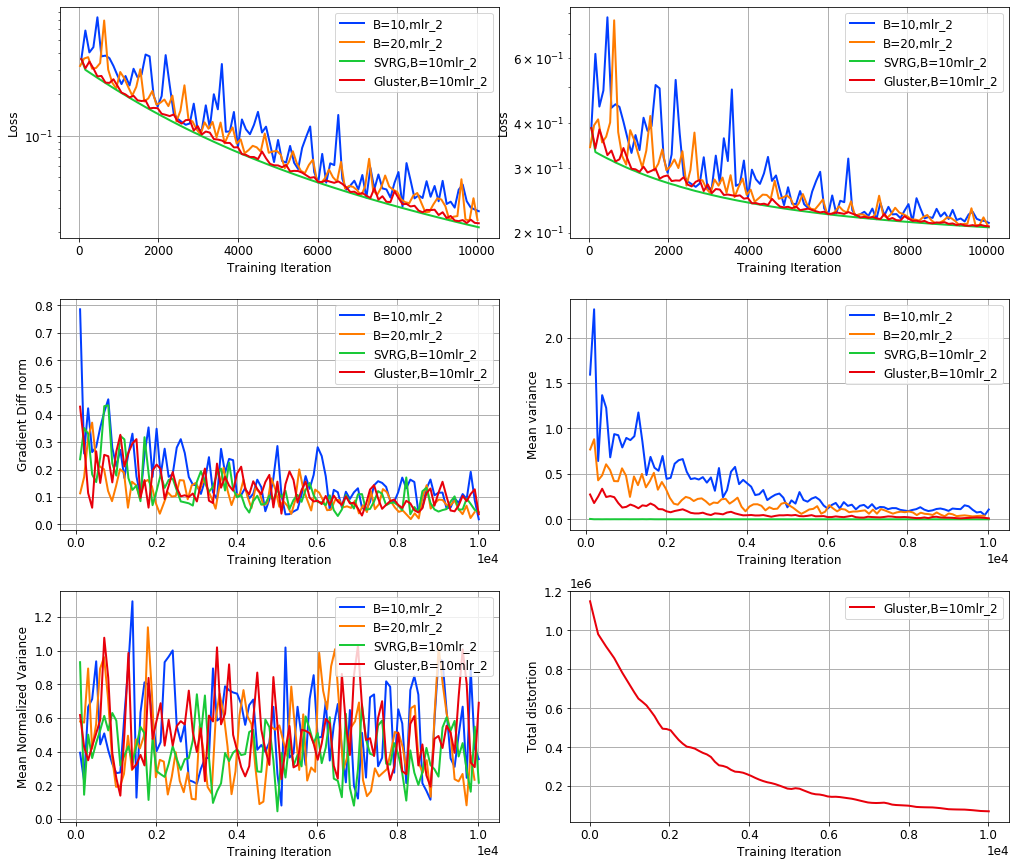

In [29]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5_bs10/.*mlr_2']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2019/linreg.png'
lg_tags = ['sgd,sgd', 'svrg', 'gluster', 'batch_size', 'mlr']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = True
lg_replace = [('sgd,sgd', 'sgd'), ('sgd,', ''), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- gluster is doing as well as svrg
- lr 2 is just enough, one lr that shows sgd as the edge of blow-up
- variance is low for 2B then gluster then svrg, all good
- distortion goes down, it is batch gluster so everything is good
- let's run it for longer to get to saturation of sgd

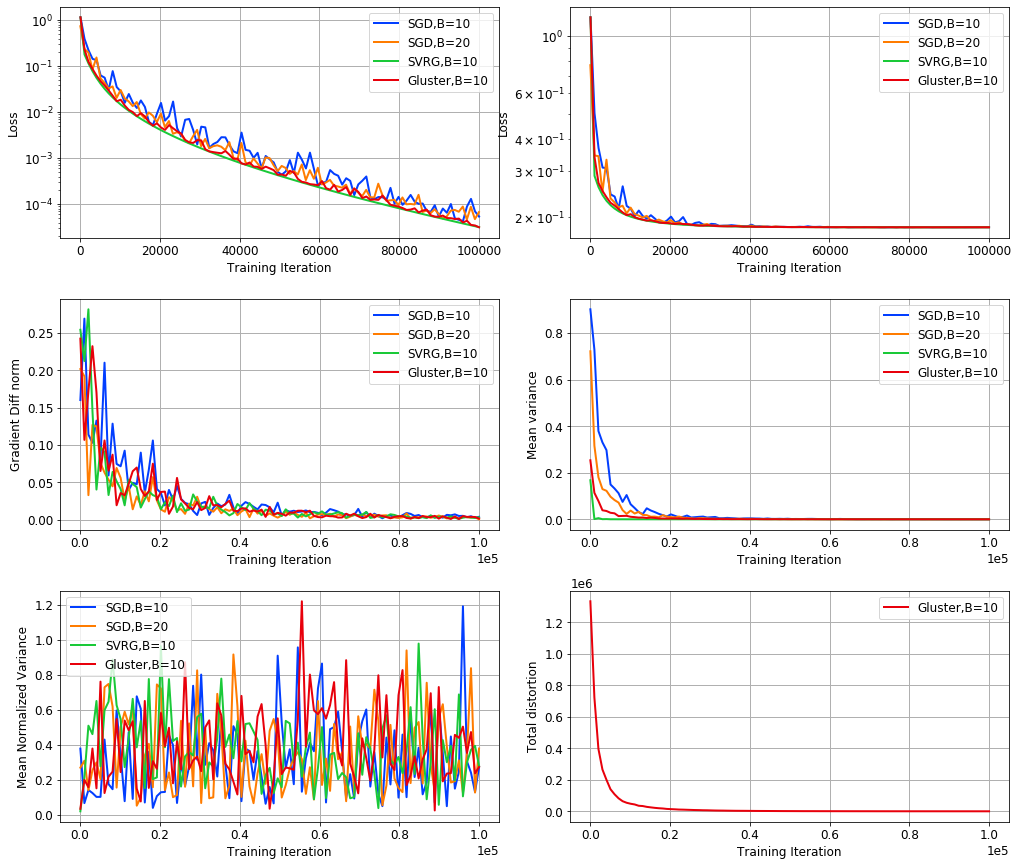

In [35]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/dmom/code/runs/'
patterns = ['.*runs_linreg_dim1000_niters1e5_bs10_lr5e-5/']  # (?!.*scheduler)
tag_names = ['Tloss', 'Vloss', 'grad_bias', 'est_var', 'est_nvar', 'gb_td']
fig_name = 'figs_icml2019/linreg.png'
lg_tags = ['estim_sgd', 'svrg', 'gluster', 'batch_size']  # g_estim
ylim = [None]*20
# ylim = [None, [0, 3e-6], None, None, [98, 100], [98, 100]]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
no_title = True
lg_replace = [('estim_sgd', 'sgd'), (' ', ','), ('g_nclusters_', 'C='), ('sgd', 'SGD'), ('svrg', 'SVRG'), ('gluster', 'Gluster'), ('g_osnap_iter_', 'Oi='), ('g_beta_', 'beta='), ('g_min_size_', 'sz='), ('duplicate_10', 'Dup'), ('batch_size_', 'B=')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

- batch size 10 is because of gluster, if it were just svrg, batch size 1 also shows its benefit
- current linreg is $w_*^T X + \epsilon$, where $w_*=0$
- for $\gamma>1$ bias is 0 and SGD can overfit to the training data, hence constant decrease we see above
- validation loss does include the bayes risk, it will not go down to zero

# todos
- is this right? batch GD being as good as SGD
- doing transformer has higher priority, if that works it is icml submission, if not, I just need linreg for arxiv
- consider other SNR and $\gamma$, eg. $\gamma<1$, here $\gamma=2$
- try duplicates
- what is the variance of double lr? is it smaller? it should be because the grad is a function of current w and double lr will converge faster, however, after saturation, decreasing lr should decrease the variance.